# Common Analysis - Forecasting and Visuals

This notebook focuses on the forecasting aspect of the common analysis. I have used the SARIMAX model for time-series forecasting

In [304]:
# Importing common libraries for this task.
# Pandas, Matplotlib, Statsmodels are libraries that you would need to install if you do not have them already.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [305]:
# Load the yearly fire_season smoke estimates for prediction
df = pd.read_csv('fire_season_estimates.csv')

In [306]:
df.head()

,Fire_Year,Smoke_Estimate
0,1963,5.890893
1,1964,7.707583
2,1965,32.840365
3,1966,3.657418
4,1967,2.210699


In [307]:
df['Fire_Year'] = pd.to_datetime(df['Fire_Year'], format='%Y')
df.set_index('Fire_Year', inplace=True)

C:\Users\arjun\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\arjun\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\arjun\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


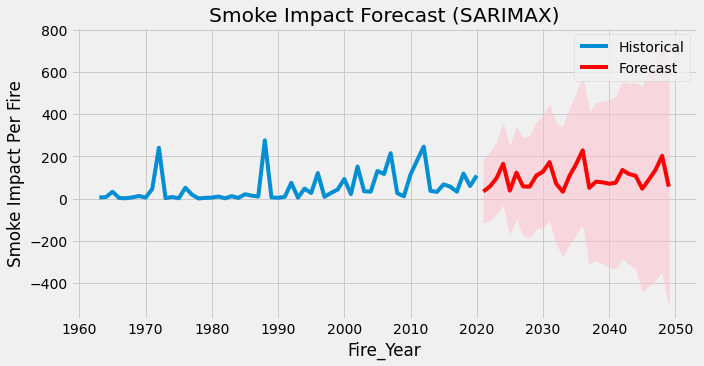

In [312]:
order = (2, 1, 0) 
seasonal_order = (1, 1, 1, 12) # Incorporating seasonal fluctuations
model = SARIMAX(df['Smoke_Estimate'], order=order, seasonal_order = seasonal_order)
results = model.fit()

# Forecast future values
forecast_steps = 29 # Data was only available until 2020. I forecast values from 2021 to 2049.
forecast = results.get_forecast(steps=forecast_steps) 
mean_forecast = forecast.predicted_mean # mean forecast values
confidence_intervals = forecast.conf_int() # By default, a 95% confidence interval is chosen

# Plot historical data and forecasts with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Smoke_Estimate'], label='Historical')
plt.plot(mean_forecast.index, mean_forecast, label='Forecast', color='red')
plt.fill_between(mean_forecast.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.5)
plt.xlabel('Fire_Year')
plt.ylabel('Smoke Impact Per Fire')
plt.title('Smoke Impact Forecast (SARIMAX)')
plt.legend()
plt.show()

In [302]:
mean_forecast

2021-01-01     34.375925
2022-01-01     58.211605
2023-01-01     97.722345
2024-01-01    165.410761
2025-01-01     38.550283
2026-01-01    123.585336
2027-01-01     58.167193
2028-01-01     57.314403
2029-01-01    109.598440
2030-01-01    127.861535
2031-01-01    173.106631
2032-01-01     71.257092
2033-01-01     33.014335
2034-01-01    107.250737
2035-01-01    162.904540
2036-01-01    228.995231
2037-01-01     51.543232
2038-01-01     80.802293
2039-01-01     77.766117
2040-01-01     70.885925
2041-01-01     76.103918
2042-01-01    136.017168
2043-01-01    117.020353
2044-01-01    108.667797
2045-01-01     47.471305
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [310]:
confidence_intervals

,lower Smoke_Estimate,upper Smoke_Estimate
2021-01-01,-114.246360,182.998210
2022-01-01,-100.305989,216.729199
2023-01-01,-70.917415,266.362105
2024-01-01,-26.454068,357.275590
2025-01-01,-165.420732,242.521299
2026-01-01,-92.178017,339.348689
2027-01-01,-171.295198,287.629584
2028-01-01,-183.418819,298.047624
2029-01-01,-142.015761,361.212640
2030-01-01,-134.679885,390.402956


# Visualization

In [363]:
viz_df = pd.read_csv('Final_Data.csv')

### Question 1:
Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city up to the max specified distance.

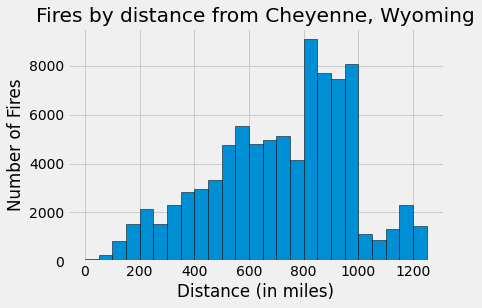

In [336]:
# Using bins for 50 mile increases in distance.
plt.hist(viz_df['Distance'], bins= range(0, 1300, 50), edgecolor='black')

plt.title('Fires by distance from Cheyenne, WY')
plt.xlabel('Distance (in miles)')
plt.ylabel('Number of Fires')
plt.grid(axis='both', alpha=1.0)
plt.savefig('Question_1.png')

plt.show()

### Question 2:
Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.

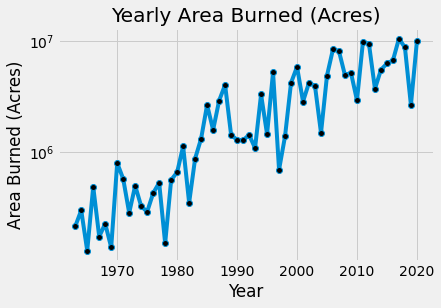

In [350]:
# Area burned yearly calculated
area_burned_yearly = viz_df.groupby('Fire_Year')['GIS_Acres'].sum()

# Graph for time series visualization
area_burned_yearly.plot(kind='line', marker='o', markerfacecolor = 'black', logy = 'sym')


plt.title('Yearly Area Burned (Acres)')
plt.xlabel('Year')
plt.ylabel('Area Burned (Acres)')
plt.grid(axis='both', alpha = 1.0)
plt.savefig('Question_2.png')

plt.show()

### Question 3:
Produce a time series graph containing your fire smoke estimate for your city and the AQI estimate for your city.

In [407]:
AQI_df = pd.read_csv("final_aqi_each_year.csv")

estimation_df = pd.read_csv("fire_season_estimates.csv")

from sklearn.preprocessing import MinMaxScaler
# Normalizing my smoke estimation scores
scaler = MinMaxScaler(feature_range=(0, 100))
estimation_df['Smoke_Estimate'] = scaler.fit_transform(estimation_df[['Smoke_Estimate']])

In [408]:
# Join the 2 datasets to get AQI and smoke estimation
aqi_and_estimation =  pd.merge(AQI_df, estimation_df, left_on='Year', right_on='Fire_Year', how='outer')

In [409]:
aqi_and_estimation.fillna(0)

,Unnamed: 0,Year,AQI,Fire_Year,Smoke_Estimate
0,0.0,1984.0,20.000000,1984.0,0.931895
1,1.0,1985.0,21.385965,1985.0,7.230676
2,2.0,1986.0,15.786885,1986.0,4.862524
3,3.0,1987.0,26.490000,1987.0,3.254422
4,4.0,1988.0,16.546296,1988.0,100.000000
...,...,...,...,...,...
56,0.0,0.0,0.000000,1981.0,3.390786
57,0.0,0.0,0.000000,1982.0,0.279793
58,0.0,0.0,0.000000,1983.0,4.018416
59,0.0,0.0,0.000000,1989.0,1.874709


In [410]:
aqi_and_estimation.drop(aqi_and_estimation[['Unnamed: 0', 'Year']], axis = 1, inplace = True)

In [411]:
final_table = pd.merge(viz_df, aqi_and_estimation, left_on='Fire_Year', right_on='Fire_Year', how='outer')

In [412]:
# Drop  duplicate columns
final_table['AQI'] = final_table['AQI'].fillna(0)
final_table['Smoke_Estimate'] = final_table['Smoke_Estimate'].fillna(0)

final_table['Year'] = pd.to_datetime(final_table['Fire_Year'], format='%Y')

final_table.head()

,Fire_Year,GIS_Acres,GIS_Hectares,Listed_Fire_Types,Listed_Fire_Dates,Shape_Length,Shape_Area,Distance,Start Date,End Date,Fire_Severity,Fire_Duration,AQI,Smoke_Estimate,Year
0,1963.0,40992.458271,16589.059302,"Wildfire (1), Likely Wildfire (3)",Listed Wildfire Discovery Date(s): 1963-08-06 ...,73550.428118,1.658906e+08,632.041602,1963-08-06,1963-12-31,5.0,148.0,0.0,1.706588,1963-01-01
1,1963.0,25757.090203,10423.524591,"Wildfire (2), Likely Wildfire (2)",Listed Wildfire Discovery Date(s): 1963-07-28 ...,59920.576713,1.042352e+08,661.238055,1963-07-28,2019-09-13,5.0,1.0,0.0,1.706588,1963-01-01
2,1963.0,45527.210986,18424.208617,"Wildfire (6), Likely Wildfire (15)",Listed Wildfire Discovery Date(s): 1963-08-06 ...,84936.827810,1.842421e+08,625.424025,1963-08-06,1963-12-31,5.0,148.0,0.0,1.706588,1963-01-01
3,1963.0,10395.010334,4206.711433,"Wildfire (2), Likely Wildfire (3)",Listed Wildfire Discovery Date(s): 1963-08-06 ...,35105.903602,4.206711e+07,576.211068,1963-08-06,1963-12-31,5.0,148.0,0.0,1.706588,1963-01-01
4,1963.0,9983.605738,4040.221900,"Wildfire (1), Likely Wildfire (3)",Listed Wildfire Discovery Date(s): 1963-08-06 ...,26870.456126,4.040222e+07,620.880899,1963-08-06,1963-12-31,5.0,148.0,0.0,1.706588,1963-01-01


C:\Users\arjun\AppData\Local\Temp\ipykernel_18888\3763513707.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('Question 3.png')


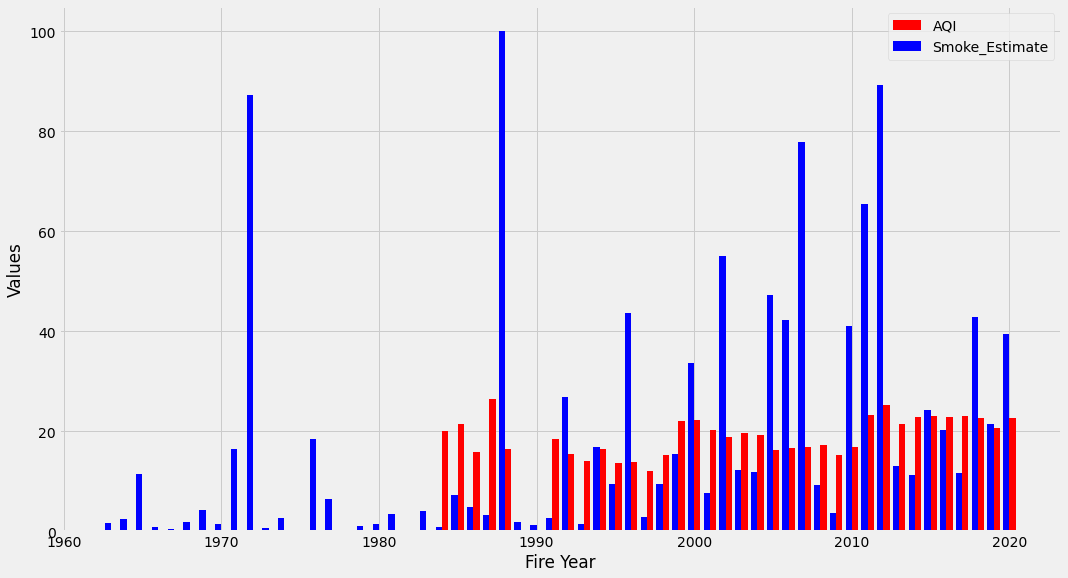

In [415]:
fig, ax = plt.subplots(figsize=(16, 9))

# Plot AQI
ax.bar(final_table['Fire_Year'] + 0.2, final_table['AQI'], width=0.4, color= 'red',  label='AQI')

# Plot Smoke Estimate
ax.bar(final_table['Fire_Year'] - 0.2, final_table['Smoke_Estimate'], width=0.4, color= 'blue', label='Smoke_Estimate')

ax.set_xlabel('Fire Year')
ax.set_ylabel('Values')
ax.legend()

plt.savefig('Question 3.png')

plt.show()